# Franck–Hertz Experiment

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import statistics
from scipy.stats import norm

In [2]:
df = pd.read_excel(r'/home/ashwin/Git/general-physics-lab/frank_hertz_exp.xlsx')
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
88    88    10.43
89    89    11.30
90    90    11.95
91    91    12.33
92    92    12.34

[93 rows x 2 columns]


In [3]:
VG2K=df['VG2K'].to_numpy()
current=df['CURRENT'].to_numpy()

/home/ashwin/.local/lib/python3.10/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/ashwin/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3378: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


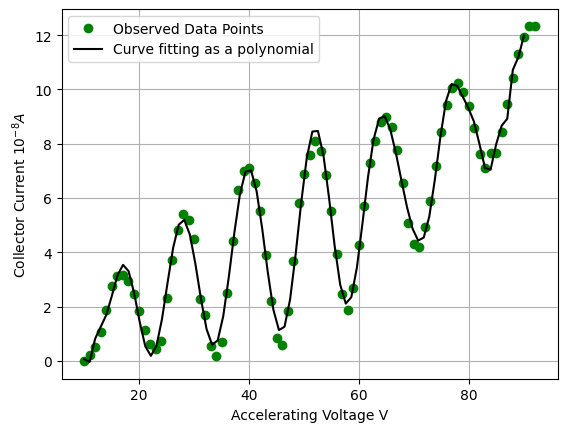

In [4]:
x=VG2K[10:]
y=current[10:]
deg=80

result=np.polyfit(x,y,deg)


p = np.poly1d(result)

xp = np.linspace(10, 90, 80)

plt.figure()
plt.plot(x, y, 'og',label="Observed Data Points")
plt.plot(xp, p(xp),'k',label="Curve fitting as a polynomial")
plt.xlabel("Accelerating Voltage V")
plt.ylabel("Collector Current $10^{-8}A$")
plt.grid("TRUE")

plt.legend()



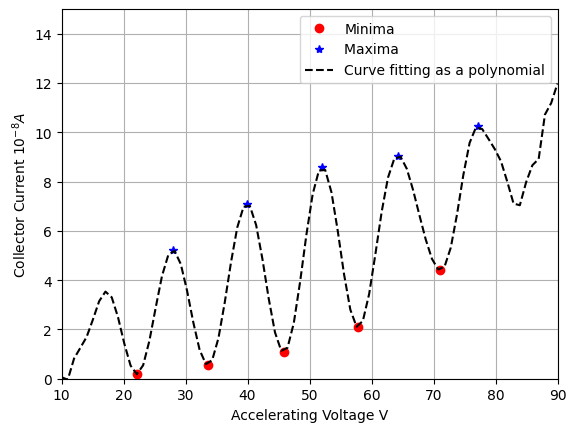

In [5]:
crit = p.deriv().r
r_crit = crit[crit.imag==0].real
test = p.deriv(2)(r_crit) 


# compute local minima 
# excluding range boundaries
x_min = r_crit
x_min=x_min[::-1]
x_min=sorted(x_min)
#Removing the ourlier values.
x_min=x_min[2:-1]

y_min = p(x_min)
plt.plot( x_min[::2], y_min[::2], 'or' , label="Minima" )
plt.plot( x_min[1::2], y_min[1::2], '*b' , label="Maxima " )


plt.plot(xp, p(xp),'k--',label="Curve fitting as a polynomial")
plt.xlabel("Accelerating Voltage V")
plt.ylabel("Collector Current $10^{-8}A$")

plt.xlim([10,90])
plt.ylim([0,15])
plt.legend()
plt.grid("TRUE")
plt.show()

In [6]:
print(df)

    VG2K  CURRENT
0      0     0.00
1      1     0.00
2      2     0.00
3      3     0.00
4      4     0.00
..   ...      ...
88    88    10.43
89    89    11.30
90    90    11.95
91    91    12.33
92    92    12.34

[93 rows x 2 columns]


In [7]:
diff=[]
for i in range(1,len(x_min)-2):
    diff.append(abs(x_min[i]-x_min[i+2]))
print(diff)
print(len(diff))

[11.95100791641168, 12.22527553677834, 12.134907404441272, 12.028577501366371, 12.2491641009251, 13.248558183581082, 12.905385630678609]
7


In [8]:
statistics.stdev(diff)

0.489575023352846

In [9]:
statistics.mean(diff)

12.39183946774035

In [10]:
mu = statistics.mean(diff)
sigma = statistics.stdev(diff)
x1 = statistics.mean(diff)-statistics.stdev(diff)
x2 = statistics.mean(diff)+statistics.stdev(diff)
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [11]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10+z1, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

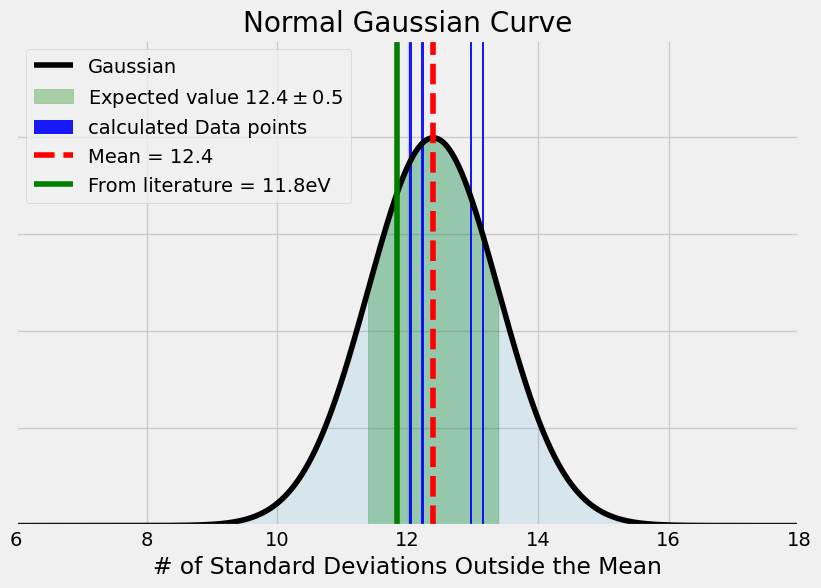

In [15]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all+mu,y2,color='k',label="Gaussian")

ax.fill_between(x+mu,y,0, alpha=0.3, color='g',label="Expected value ${0} \pm {1}$".format(round(mu,1),round(sigma,1)))
ax.fill_between(x_all+mu,y2,0, alpha=0.1)
ax.set_xlim([6,18])
ax.set_ylim([0,0.5])

ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')
ax.hist(diff,bins=len(diff), color='b', alpha=0.9, rwidth=0.2,density=True,label="calculated Data points")
#plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
ax.plot([mu,mu],[0,1],'r--',label="Mean = {0} ".format(round(mu,1)))
ax.plot([11.83,11.83],[0,1],'g-',label="From literature = {0}eV ".format(round(11.83,1)))

ax.legend()
ax.grid("TRUE")
plt.show()

In [13]:
print("Percentage error compared with literature is \n {0}%".format(round(abs((statistics.mean(diff)-11.83)/11.83*100),2)))

Percentage error compared with literature is 
 4.75%


In [14]:
print("The Energy drop on inelastic collision of electron on Argon atom is :  : \n  {0} +- {1} ".format(round(statistics.mean(diff),1),round(statistics.stdev(diff),1))) 

The Energy drop on inelastic collision of electron on Argon atom is :  : 
  12.4 +- 0.5 


This Concludes and quantization of energy in atomic model as per Quantum theory.